# Proyecto

###  Satisfacción de clientes de líneas aéreas

|Campo|Descripción|
|---|:---|
|id|Número de identificación único para cada pasajero.|
|Gender|Género de los pasajeros (Femenino, Masculino)|
|Customer Type|El tipo de cliente (Cliente fiel, cliente desleal)|
|Age|La edad real de los pasajeros|
|Type of Travel|Motivo del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)|
|Class|Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)|
|Flight distance|La distancia del vuelo de este viaje|
|Inflight wifi service|Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)|
|Departure/Arrival time convenient|Nivel de satisfacción de Hora de Salida/Llegada conveniente|    
|Ease of Online booking|Nivel de satisfacción de la reserva online|    
|Gate location|Nivel de satisfacción de la ubicación de la puerta|    
|Food and drink|Nivel de satisfacción de Comida y bebida|    
|Online boarding|Nivel de satisfacción del embarque online|    
|Seat comfort|Nivel de satisfacción de Confort del asiento|    
|Inflight entertainment|Nivel de satisfacción del entretenimiento a bordo|    
|On-board service|Nivel de satisfacción del servicio a bordo|    
|Leg room service|Nivel de satisfacción del servicio de sala de piernas|    
|Baggage handling|Nivel de satisfacción en la gestión de equipajes|    
|Check-in service|Nivel de satisfacción del servicio Check-in|    
|Inflight service|Nivel de satisfacción del servicio a bordo|    
|Cleanliness|Nivel de Satisfacción de Limpieza|    
|Departure Delay in Minutes|Minutos de retraso en la salida|    
|Arrival Delay in Minutes|Minutos de retraso a la Llegada|    
|Satisfaction|Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
vuelosTrain = pd.read_csv("vuelosTrain.csv")
#vuelosTest = pd.read_csv("vuelosTest.csv")
vuelosTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [3]:
vuelosTrain.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
vuelosTest.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
vuelosTrain.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
def graficosBarras(item):
    x=vuelosTrain[item]
    valorx=x.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(valorx.index,valorx.values)
    plt.xlabel("Calificación")
    plt.ylabel("Frecuencia")
    plt.title(item)
    plt.show()
    print("{}: \n {}".format(x,valorx))

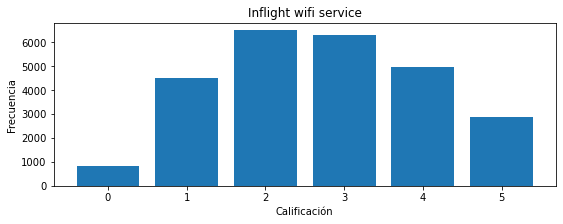

0        5
1        1
2        2
3        0
4        2
        ..
25971    3
25972    4
25973    2
25974    3
25975    2
Name: Inflight wifi service, Length: 25976, dtype: int64: 
 2    6490
3    6317
4    4981
1    4488
5    2887
0     813
Name: Inflight wifi service, dtype: int64


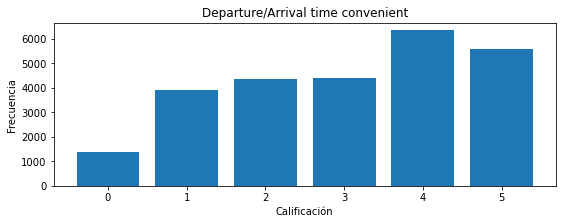

0        4
1        1
2        0
3        0
4        3
        ..
25971    3
25972    4
25973    5
25974    3
25975    5
Name: Departure/Arrival time convenient, Length: 25976, dtype: int64: 
 4    6334
5    5595
3    4412
2    4343
1    3911
0    1381
Name: Departure/Arrival time convenient, dtype: int64


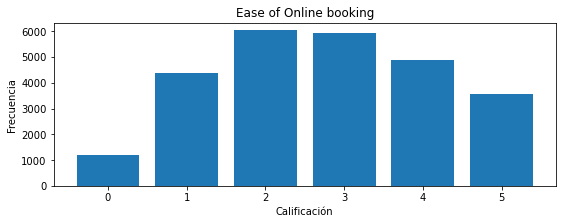

0        3
1        3
2        2
3        0
4        4
        ..
25971    3
25972    4
25973    1
25974    3
25975    2
Name: Ease of Online booking, Length: 25976, dtype: int64: 
 2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: Ease of Online booking, dtype: int64


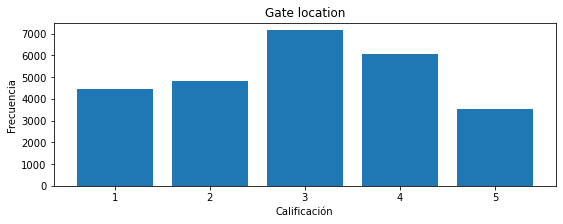

0        4
1        1
2        4
3        2
4        3
        ..
25971    1
25972    4
25973    5
25974    3
25975    5
Name: Gate location, Length: 25976, dtype: int64: 
 3    7140
4    6040
2    4837
1    4429
5    3530
Name: Gate location, dtype: int64


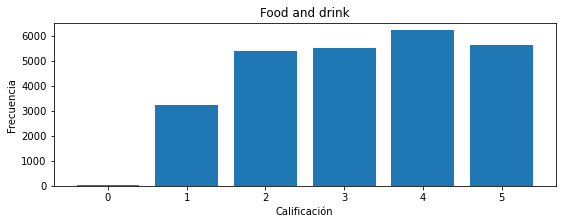

0        3
1        5
2        2
3        3
4        4
        ..
25971    4
25972    4
25973    2
25974    4
25975    4
Name: Food and drink, Length: 25976, dtype: int64: 
 4    6204
5    5644
3    5494
2    5395
1    3214
0      25
Name: Food and drink, dtype: int64


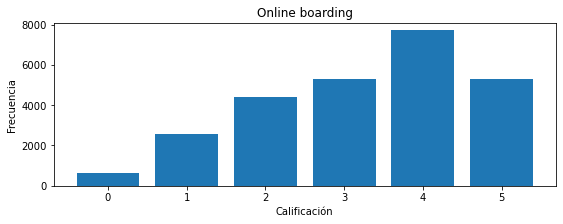

0        4
1        4
2        2
3        4
4        1
        ..
25971    3
25972    4
25973    1
25974    4
25975    2
Name: Online boarding, Length: 25976, dtype: int64: 
 4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: Online boarding, dtype: int64


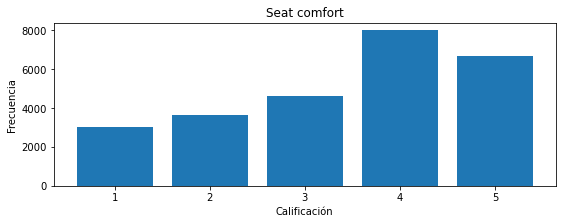

0        3
1        5
2        2
3        4
4        2
        ..
25971    4
25972    4
25973    2
25974    4
25975    2
Name: Seat comfort, Length: 25976, dtype: int64: 
 4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64


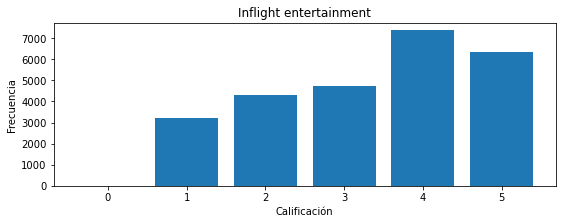

0        5
1        4
2        2
3        1
4        2
        ..
25971    4
25972    4
25973    2
25974    4
25975    1
Name: Inflight entertainment, Length: 25976, dtype: int64: 
 4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: Inflight entertainment, dtype: int64


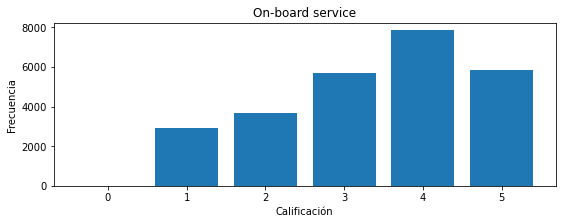

0        5
1        4
2        4
3        1
4        2
        ..
25971    3
25972    4
25973    4
25974    3
25975    1
Name: On-board service, Length: 25976, dtype: int64: 
 4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: On-board service, dtype: int64


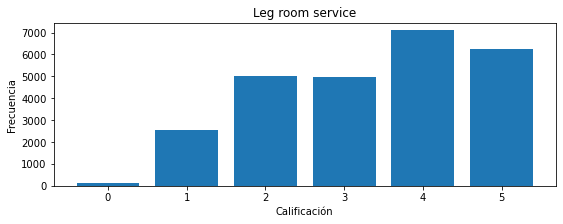

0        5
1        4
2        1
3        1
4        2
        ..
25971    2
25972    5
25973    3
25974    2
25975    2
Name: Leg room service, Length: 25976, dtype: int64: 
 4    7097
5    6238
2    5015
3    4958
1    2542
0     126
Name: Leg room service, dtype: int64


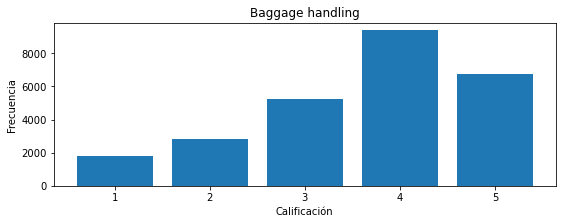

0        5
1        4
2        3
3        1
4        2
        ..
25971    4
25972    5
25973    4
25974    5
25975    1
Name: Baggage handling, Length: 25976, dtype: int64: 
 4    9378
5    6747
3    5219
2    2841
1    1791
Name: Baggage handling, dtype: int64


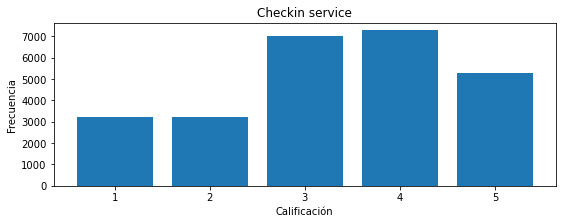

0        2
1        3
2        2
3        3
4        4
        ..
25971    4
25972    5
25973    5
25974    4
25975    1
Name: Checkin service, Length: 25976, dtype: int64: 
 4    7278
3    7007
5    5264
1    3218
2    3209
Name: Checkin service, dtype: int64


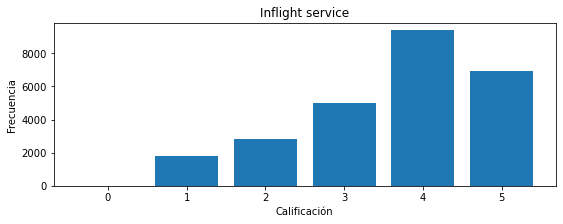

0        5
1        4
2        2
3        1
4        2
        ..
25971    5
25972    5
25973    4
25974    5
25975    1
Name: Inflight service, Length: 25976, dtype: int64: 
 4    9378
5    6950
3    5017
2    2851
1    1778
0       2
Name: Inflight service, dtype: int64


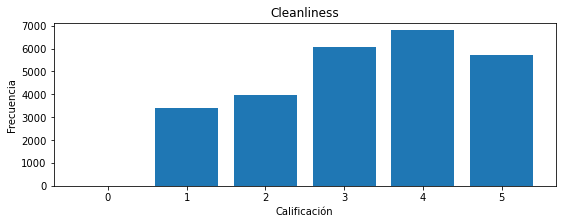

0        5
1        5
2        2
3        4
4        4
        ..
25971    4
25972    4
25973    2
25974    4
25975    1
Name: Cleanliness, Length: 25976, dtype: int64: 
 4    6790
3    6065
5    5727
2    3981
1    3411
0       2
Name: Cleanliness, dtype: int64


In [5]:
variable=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in variable:
    graficosBarras(c)

In [6]:
categoricas=["Gender", "Customer Type", "Type of Travel", "Class","satisfaction"]
for c in categoricas:
    print("{} \n".format(vuelosTrain[c].value_counts()))

Female    13172
Male      12804
Name: Gender, dtype: int64 

Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64 

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64 

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64 

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64 



In [7]:
def histogramas(x):
    plt.figure(figsize=(9,3))
    plt.hist(vuelosTrain[x],bins=50)
    plt.xlabel(x)
    plt.ylabel("Frecuencia")
    plt.title("{} distribución histograma".format(x))
    plt.show()

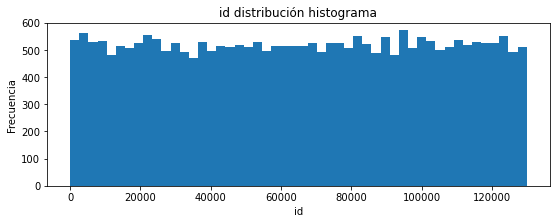

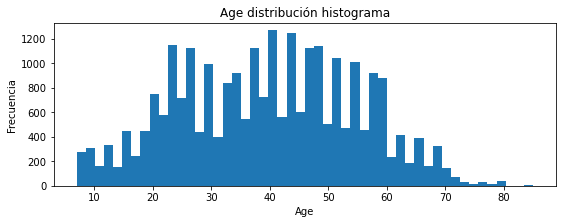

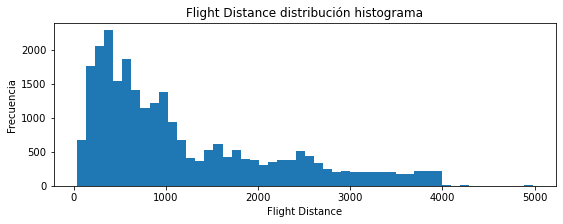

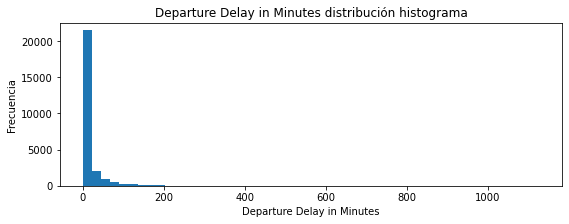

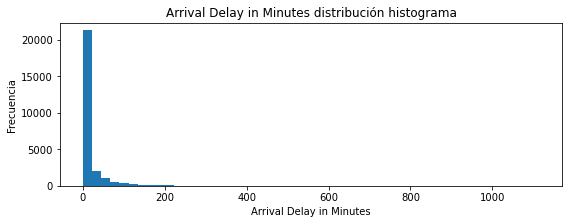

In [8]:
varNumericas=["id","Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in varNumericas:
    histogramas(n)

In [9]:
vuelosTrain["satisfaction"]=[1 if each=="satisfied" else 0 for each in vuelosTrain.satisfaction]
vuelosTrain.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,...,5,5,5,5,4,5,3,0,0.0,1
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,...,4,4,4,4,5,4,3,77,65.0,1
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,...,5,2,2,5,3,3,5,1,0.0,1
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,...,4,4,4,4,5,4,4,28,14.0,1


In [10]:
def efectos(x):
    aux = vuelosTrain[[x,"satisfaction"]].groupby([x],as_index=False).mean().sort_values(by="satisfaction",ascending=False)
    print(aux)

In [11]:
efectos("Gender")


   Gender  satisfaction
1    Male      0.442674
0  Female      0.435393


In [12]:
efectos("Age")

    Age  satisfaction
44   51      0.630219
46   53      0.617336
34   41      0.614534
39   46      0.613879
49   56      0.606195
..  ...           ...
4    11      0.132075
62   69      0.117647
63   70      0.093960
1     8      0.076433
0     7      0.073171

[75 rows x 2 columns]


In [13]:
efectos("Type of Travel")

    Type of Travel  satisfaction
0  Business travel      0.588203
1  Personal Travel      0.099899


In [14]:
efectos("Class")

      Class  satisfaction
0  Business      0.695158
2  Eco Plus      0.247783
1       Eco      0.193878


In [15]:
efectos("Customer Type")

       Customer Type  satisfaction
0     Loyal Customer      0.481419
1  disloyal Customer      0.251719


In [16]:
efectos("Cleanliness")

   Cleanliness  satisfaction
5            5      0.627030
4            4      0.535052
3            3      0.437923
2            2      0.211253
1            1      0.199941
0            0      0.000000


In [17]:
efectos("Inflight wifi service")

   Inflight wifi service  satisfaction
0                      0      0.997540
5                      5      0.987877
4                      4      0.607910
1                      1      0.339127
3                      3      0.256926
2                      2      0.241448


In [18]:
efectos("Inflight entertainment")

   Inflight entertainment  satisfaction
5                       5      0.659296
4                       4      0.608578
3                       3      0.285564
2                       2      0.210113
1                       1      0.150141
0                       0      0.000000


In [19]:
efectos("Food and drink")

   Food and drink  satisfaction
5               5      0.558292
4               4      0.529175
3               3      0.401711
2               2      0.393327
0               0      0.200000
1               1      0.197573


In [20]:
efectos("Seat comfort")

   Seat comfort  satisfaction
4             5      0.655801
3             4      0.556876
1             2      0.233756
2             3      0.224309
0             1      0.223871


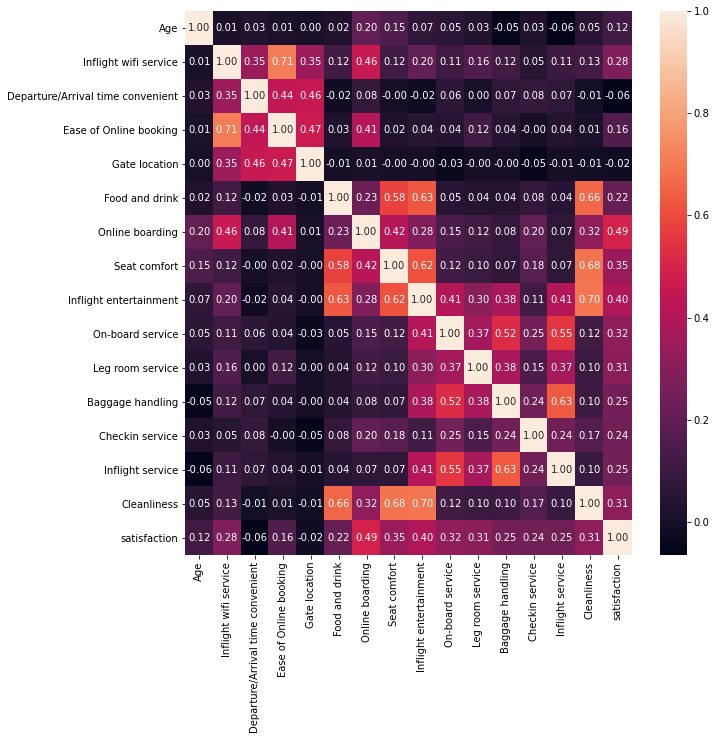

In [21]:
plt.figure(figsize=(10,10))
list1=["Age",'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',"satisfaction"]
sns.heatmap(vuelosTrain[list1].corr(),annot=True,fmt=".2f")
plt.show()